## CNN

차원 축소하지 않은 데이터 사용

In [1]:
import pandas as pd
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, initializers
from keras.optimizers import RMSprop, Adadelta, Adam, SGD, Adagrad
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
import pickle # 파이썬 객체저장을 위한 모듈

Using TensorFlow backend.


## 사전값 셋팅 확인 필수

In [331]:
df = 'all'   # 수정필수
# core/all/main




# core설정시 확인해야 함
# R을 통해 확인한 stepwise 유의 변수 리스트
core_factors = ['DR00000136','6000201001O0','6000903016D1','FNMKFN02','6000901002D1','S41000210FD1',
'6000207003O0','DR00000052','6000906001D6','DR00000156','6000901001D3','DR00000082',
'S41000210FD2','6000902001D2','6000908001D3','6000904001D3','6000908001D2','S41B0D1009O0',
'6000901002D3','6000903001D2','6000403001O0','CO10100170O0','DR00000113','6000908001D7']

#  키별로 비율 배분이 잘 됐는지 확인
if df == 'all':
    max_idx = 707
else:
    max_idx = 123
    

## 데이터셋 셋팅

In [332]:
import pickle # 파이썬 객체저장을 위한 모듈

# 파이썬 객체 읽어오기

if df == 'all':
    with open('./pickles/data6vs4_all.p', 'rb') as file:    # hello.txt 파일을 바이너리 읽기 모드(rb)로 열기
        temp_train_set = pickle.load(file)
        temp_test_set = pickle.load(file)
        af_cols = pickle.load(file)
else:
    with open('./pickles/data6vs4_main.p', 'rb') as file:    # hello.txt 파일을 바이너리 읽기 모드(rb)로 열기
        temp_train_set = pickle.load(file)
        temp_test_set = pickle.load(file)
        af_cols = pickle.load(file)


In [333]:
train_set = temp_train_set.drop(['index', 0, max_idx-1,max_idx],axis=1)  # 열삭제
test_set = temp_test_set.drop(['index', 0, max_idx-1,max_idx],axis=1)  # 열삭제


In [334]:
# 항목명 (열명) 셋팅
factor_cols = list(af_cols[1:-2])
train_set.columns = factor_cols
test_set.columns = factor_cols
train_set.head()

,key,industry,label,S430000600O0,3001104004O0,3001212005O0,3001403004O0,3001111005O0,S430000100O0,3001104004J0,...,DR00000157,DR00000158,DR00000159,DR00000160,DR00000161,DR00000162,DR00000163,DR00000164,DR00000165,DR00000166
0,2017217190,C,0,10.2437,2.96982,2.88132,2.84527,-0.456624,2.22591,-0.00312026,...,1,0,1,0,0,0,0,1,0,0
1,2016097870,C,0,11.3082,2.96982,2.88132,2.84527,-1.88693,2.22591,-0.00359014,...,1,0,3,0,0,0,0,0,0,0
2,2015115610,C,0,10.7966,2.96982,2.88132,2.84527,-1.88693,2.22591,0.00687726,...,1,0,3,0,0,0,0,1,0,0
3,2017093050,C,0,13.7269,2.96982,2.88132,2.84527,-1.88693,-0.851603,-0.00309731,...,1,0,1,0,0,0,0,0,0,0
4,2013005030,C,0,9.76709,2.96982,2.88132,2.84527,-0.456624,2.22591,-0.00312026,...,1,0,3,0,1,1,0,1,0,0


In [335]:
# core인 경우 main에서 핵심 변수만 추림

if df == 'core':
    final_factors = ['key', 'industry', 'label']
    final_factors = final_factors + core_factors
    train_set = train_set[final_factors]
    test_set = test_set[final_factors]
else:
    pass

In [336]:
df, train_set.shape, test_set.shape

('all', (755, 705), (333, 705))

In [337]:
train_set.head()

,key,industry,label,S430000600O0,3001104004O0,3001212005O0,3001403004O0,3001111005O0,S430000100O0,3001104004J0,...,DR00000157,DR00000158,DR00000159,DR00000160,DR00000161,DR00000162,DR00000163,DR00000164,DR00000165,DR00000166
0,2017217190,C,0,10.2437,2.96982,2.88132,2.84527,-0.456624,2.22591,-0.00312026,...,1,0,1,0,0,0,0,1,0,0
1,2016097870,C,0,11.3082,2.96982,2.88132,2.84527,-1.88693,2.22591,-0.00359014,...,1,0,3,0,0,0,0,0,0,0
2,2015115610,C,0,10.7966,2.96982,2.88132,2.84527,-1.88693,2.22591,0.00687726,...,1,0,3,0,0,0,0,1,0,0
3,2017093050,C,0,13.7269,2.96982,2.88132,2.84527,-1.88693,-0.851603,-0.00309731,...,1,0,1,0,0,0,0,0,0,0
4,2013005030,C,0,9.76709,2.96982,2.88132,2.84527,-0.456624,2.22591,-0.00312026,...,1,0,3,0,1,1,0,1,0,0


### 데이터 분리 및 타입변경

In [338]:
# 데이터 분리
cols = train_set.columns.values
train_info = train_set[cols[0:3]]
x_train = train_set[cols[3:]]
y_train = train_set['label']
train_len = x_train.shape[0]

cols = test_set.columns.values
test_info = test_set[cols[0:3]]
x_test = test_set[cols[3:]]
y_test = test_set['label']
test_len = x_test.shape[0]

In [339]:
x_train.shape, y_train.shape

((755, 702), (755,))

In [340]:
x_train = np.array(x_train)
x_test = np.array(x_test)

### MIN MAX 스케일 조정


스케일링 하는 이유 : 데이터가 0~1이 아닐 경우 loss가 마이너스로 계산됨. 학습이 정상적이지 않을 수 있음.

다른 딥러닝 모델에서도 이미지 학습시 /255 처리하는 이유


In [341]:

# 데이터 스케일 조정 (MinMax)
# 재작업시 위에 실행 후 처리하기

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit_transform(x_train)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


### 모델 입력값 설정

In [342]:
np.random.seed(42)

# 분류갯수
classes = 2

# 학습데이터
img_rows = 1
img_cols = x_train.shape[1] 



In [343]:
img_rows, img_cols

(1, 702)

### input shape 변경

In [344]:
# X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
# X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1], 1) # (1, # of features, # of chnnels) # input.shape[1:끝]
X_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1], 1) # (1, # of features, # of chnnels) # input.shape[1:끝]

# 변수명 전환
Y_train = y_train
Y_test = y_test

input_shape= X_train.shape[1:4]
print(input_shape)

(1, 702, 1)


In [345]:
x_train.shape[0]

755

In [346]:
### 모델 파라메터 설정

In [347]:

# if x_train.shape[1] >= 100:
#     filter_size = 8
# elif x_train.shape[1] >= 50:
#     filter_size = 8
# else:
#     filter_size = 8

filter_size = 4
batch_size = 50
epochs = 50

print("한번에 처리될 row 수 :", batch_size, ",   한 row date가 반복 학습될 횟수 : ", epochs, ",   ", x_train.shape[0]*epochs, "개 row에 대해 학습하게 됨")

print("\n< 처리기준 >")
print_string = "n : {}, m :{}, filter_size : {}, batch_size : {}, epochs : {}"
print(print_string.format(x_train.shape[0],x_train.shape[1],filter_size,batch_size,epochs))


한번에 처리될 row 수 : 50 ,   한 row date가 반복 학습될 횟수 :  50 ,    37750 개 row에 대해 학습하게 됨

< 처리기준 >
n : 755, m :702, filter_size : 4, batch_size : 50, epochs : 50


In [348]:
# Y값을 1개항목에서 카테고리화 함
Y_train = to_categorical(y_train, num_classes=classes) # one-hot 인코딩
Y_test = to_categorical(y_test, num_classes=classes) # one-hot 인코딩

Y_train.shape, Y_test.shape

((755, 2), (333, 2))

## CNN 모델 설계

- 활성화함수 : relu보다 elu사용해 0에 수렴하는 케이스 방지. 단 속도가 느려질 수 있음
- 초기화함수 : he_normal를 사용. relu 파생 활성화함수는 xavier에 적합하지 않으므로
(normal, uniform 중 normal 사용. 더 성능이 우수함)

In [349]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((755, 1, 702, 1), (333, 1, 702, 1), (755, 2), (333, 2))

In [350]:
# 1. 모델구성
model = Sequential()

model.add(Conv2D(filter_size, (1, 2), input_shape = X_train.shape[1:4], activation = 'relu', padding='same', init="he_normal")) # 2D (1, 4) size 필터
model.add(Activation('elu'))

model.add(Conv2D(filter_size*2, (1, 4), padding='same', kernel_initializer="he_normal"))
# model.add(BatchNormalization())
model.add(Activation('elu'))
# model.add(MaxPooling2D((1, 2)))
# model.add(Dropout(0.2))

model.add(Conv2D(filter_size*2, (1, 4), padding='same', kernel_initializer="he_normal"))
# model.add(BatchNormalization())
model.add(Activation('elu'))

model.add(Conv2D(filter_size, (1, 4), kernel_initializer="he_normal"))
model.add(Activation('elu'))
# model.add(MaxPooling2D((1, 2)))
# model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(classes, activation = 'sigmoid', init="glorot_normal"))# 마지막 class 분류

# 2. 모델 학습과정 설정하기
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(4, (1, 2), input_shape=(1, 702, 1..., activation="relu", padding="same", kernel_initializer="he_normal")`
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, activation="sigmoid", kernel_initializer="glorot_normal")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_127 (Conv2D)          (None, 1, 702, 4)         12        
_________________________________________________________________
activation_125 (Activation)  (None, 1, 702, 4)         0         
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 1, 702, 8)         136       
_________________________________________________________________
activation_126 (Activation)  (None, 1, 702, 8)         0         
_________________________________________________________________
conv2d_129 (Conv2D)          (None, 1, 702, 8)         264       
_________________________________________________________________
activation_127 (Activation)  (None, 1, 702, 8)         0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 1, 699, 4)         132       
__________

In [351]:
# 3. 모델 학습시키기

hist = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_split = .2)

Train on 604 samples, validate on 151 samples
Epoch 1/50
604/604 [==============================] - 8s 14ms/step - loss: 0.5620 - acc: 0.7368 - val_loss: 0.9300 - val_acc: 0.2649
Epoch 2/50
604/604 [==============================] - 6s 9ms/step - loss: 0.3644 - acc: 0.8460 - val_loss: 1.0391 - val_acc: 0.5232
Epoch 3/50
604/604 [==============================] - 6s 10ms/step - loss: 0.2752 - acc: 0.8841 - val_loss: 1.3130 - val_acc: 0.4967
Epoch 4/50
604/604 [==============================] - 6s 10ms/step - loss: 0.2768 - acc: 0.8841 - val_loss: 1.0171 - val_acc: 0.6159
Epoch 5/50
604/604 [==============================] - 6s 10ms/step - loss: 0.2342 - acc: 0.9123 - val_loss: 0.9879 - val_acc: 0.6159
Epoch 6/50
604/604 [==============================] - 6s 10ms/step - loss: 0.2063 - acc: 0.9288 - val_loss: 0.6664 - val_acc: 0.7550
Epoch 7/50
604/604 [==============================] - 7s 11ms/step - loss: 0.1959 - acc: 0.9321 - val_loss: 0.8617 - val_acc: 0.6954
Epoch 8/50
604/604 [====

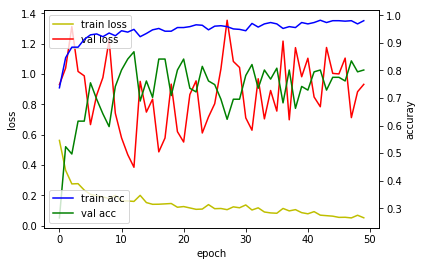

755/755 [==============================] - 0s 605us/step
Train score: 0.2222
Train accuracy: 0.9483
333/333 [==============================] - 0s 650us/step
Test score: 0.5968
Test accuracy: 0.8288


In [352]:

# 4. 학습과정 살펴보기(그래프)
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()


# 5. 모델 평가하기 - 테스트셋
'''
score는 비용함수에 대한 평가값
'''

score = model.evaluate(X_train, Y_train, verbose=1)
print('Train score: {:.4f}'.format(score[0]))
print('Train accuracy: {:.4f}'.format(score[1]))


score = model.evaluate(X_test, Y_test, verbose=1)
print('Test score: {:.4f}'.format(score[0]))
print('Test accuracy: {:.4f}'.format(score[1]))

# model.evaluate ; 손실 값을 계산하는 데 사용
# model.predict_classes() ; 범주 출력을 계산하는 데 사용
# model.predict_proba() ; 범주 확률을 계산하는 데 사용


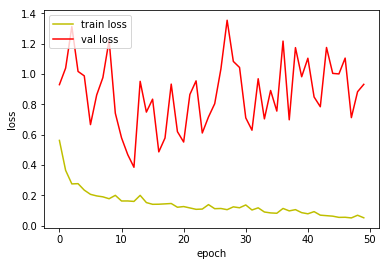

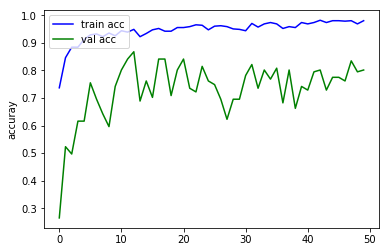

In [353]:

# 5. 분리된 그래프

# loss
fig, loss_ax = plt.subplots()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

loss_ax.legend(loc='upper left')

plt.show()

# accuray
fig, acc_ax = plt.subplots()

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
acc_ax.set_ylabel('accuray')

acc_ax.legend(loc='upper left')

plt.show()


In [330]:
X_train.reshape(-1,X_train.shape[2])

array([[0.        , 0.05776515, 0.85217175, ..., 0.07416437, 0.        ,
        1.        ],
       [0.        , 0.21440362, 0.92364485, ..., 0.10109309, 0.        ,
        0.        ],
       [0.        , 0.21440362, 0.89229149, ..., 0.19876986, 0.        ,
        0.        ],
       ...,
       [0.        , 0.21440362, 0.80203268, ..., 0.19876986, 0.        ,
        1.        ],
       [1.        , 0.21440362, 0.80213942, ..., 0.19876986, 0.        ,
        1.        ],
       [1.        , 0.21440362, 0.79781884, ..., 0.19876986, 0.        ,
        1.        ]])

In [ ]:
# 사용한 데이터 검증용 (엑셀 전환 후 비교)

In [80]:
x_train_df = pd.DataFrame(X_train.reshape(-1,X_train.shape[2]))
x_test_df = pd.DataFrame(X_test.reshape(-1,X_test.shape[2]))
y_train_df = pd.DataFrame(Y_train)
y_test_df = pd.DataFrame(Y_test)

In [86]:
train_list = [train_info,y_train_df, x_train_df]
test_list = [test_info,y_test_df, x_test_df]

result_train = pd.concat(train_list,axis=1) 
result_test = pd.concat(test_list,axis=1) 

# 파일 생성
result_train.to_csv('./datas/train_check.csv')
result_test.to_csv('./datas/test_check.csv')

In [89]:
cols = train_set.columns.values
cols[3:]

array(['DR00000136', '6000201001O0', '6000903016D1', 'FNMKFN02',
       '6000901002D1', 'S41000210FD1', '6000207003O0', 'DR00000052',
       '6000906001D6', 'DR00000156', '6000901001D3', 'DR00000082',
       'S41000210FD2', '6000902001D2', '6000908001D3', '6000904001D3',
       '6000908001D2', 'S41B0D1009O0', '6000901002D3', '6000903001D2',
       '6000403001O0', 'CO10100170O0', 'DR00000113', '6000908001D7'],
      dtype=object)